# Описание проекта <a class="anchor" id="desc_pro"></a>
Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Вам предстоит изучить:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.


# Описание данных <a class="anchor" id="desc_data"></a>
В вашем распоряжении три датасета.
Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.
Структура visits_log.csv
 - Uid — уникальный идентификатор пользователя,
 - Device — категория устройства пользователя,
 - Start Ts — дата и время начала сессии,
 - End Ts — дата и время окончания сессии,
 - Source Id — идентификатор источника перехода на сайт.

Структура orders_log.csv
 - Uid — уникальный идентификатор пользователя,
 - Buy Ts — дата и время заказа,
 - Revenue — сумма заказа.

Структура costs.csv
 - source_id — идентификатор рекламного источника,
 - dt — дата проведения рекламной кампании,
 - costs — расходы на эту кампанию.

# Оглавление

[Описание проекта](#desc-pro)

[Описание данных](#desc-data)

1. [Шаг 1. Загрузите данные и подготовьте их к анализу](#step1)
    - 1.1. Положите данные о визитах, заказах и рекламных расходах в переменные
    - 1.2. Подготовьте данные. Убедитесь, что тип данных во всех колонках соответствует сохранённым в них значениям
    - 1.3. Вывод
    
2. [Шаг 2. Рассчитайте метрики и постройте графики](#step2)
    - [2.1. Продуктовые метрики](#step2.1)
        - 2.1.1 DAU, WAU и MAU
        - 2.1.2 сколько раз за день пользователи в среднем заходят на сайт
        - 2.1.3 сколько времени пользователи проводят на сайте
        - 2.1.4 Retention Rate
        - 2.1.5 Вывод
    - [2.2 Метрики электронной коммерции](#step2.2)
        - 2.2.1 сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки
        - 2.2.2 среднее количество покупок на одного покупателя
        - 2.2.3 средний чек
        - 2.2.4 LTV
        - 2.2.5 Вывод
    - [2.3 Маркетинговые метрики](#step2.3)
        - 2.3.1 Общая сумма расходов на маркетинг
        - 2.3.2 CAC
        - 2.3.3 ROMI по когортам
    - [Шаг 3. Сформулируйте выводы и рекомендации](#step3)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## Шаг 1. Загрузите данные и подготовьте их к анализу <a class="anchor" id="step1"></a>

### Положите данные о визитах, заказах и рекламных расходах в переменные

In [4]:
visits = pd.read_csv('/content/drive/MyDrive/praktikum/afisha/visits_log.csv')
orders = pd.read_csv('/content/drive/MyDrive/praktikum/afisha/orders_log.csv')
costs = pd.read_csv('/content/drive/MyDrive/praktikum/afisha/costs.csv')

In [5]:
#В цикле посмотрим на каждую таблицу и информацию о ней
for i in ['visits', 'orders', 'costs']:
    print('ТАБЛИЦА: ', i, '\n')
    eval(i).info()
    print('\n', 'Дубликатов: ', eval(i).duplicated().sum())
    display(eval(i).head(10))
    print('='*70, '\n')
    print('\t')

ТАБЛИЦА:  visits 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

 Дубликатов:  0


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063



	
ТАБЛИЦА:  orders 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

 Дубликатов:  0


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382



	
ТАБЛИЦА:  costs 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

 Дубликатов:  0


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [6]:
#Посмотрим на значения внутри таблиц
for i in ['visits', 'orders', 'costs']:
    print('ТАБЛИЦА: ', i, '\n')
    
    for col in eval(i).columns:
        print('Столбец: ', col)
        display(eval(i)[col].value_counts(dropna=False))
        print('*' * 30, '\n')
    print('='*70, '\n\n')
    

ТАБЛИЦА:  visits 

Столбец:  Device


desktop    262567
touch       96833
Name: Device, dtype: int64

****************************** 

Столбец:  End Ts


2017-11-24 16:51:00    23
2017-11-24 16:52:00    21
2017-11-24 16:50:00    18
2017-11-24 16:46:00    15
2017-11-24 16:48:00    14
                       ..
2018-05-04 16:22:00     1
2018-05-13 23:01:00     1
2017-09-01 17:30:00     1
2018-02-25 00:15:00     1
2018-05-09 16:24:00     1
Name: End Ts, Length: 224760, dtype: int64

****************************** 

Столбец:  Source Id


4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
Name: Source Id, dtype: int64

****************************** 

Столбец:  Start Ts


2017-11-24 16:06:00    19
2018-05-31 10:01:00    15
2017-11-24 17:21:00    15
2017-11-24 17:19:00    15
2017-11-24 16:05:00    14
                       ..
2018-05-04 21:37:00     1
2018-03-13 20:52:00     1
2017-09-28 18:22:00     1
2017-10-19 20:31:00     1
2017-09-08 23:00:00     1
Name: Start Ts, Length: 224303, dtype: int64

****************************** 

Столбец:  Uid


12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: Uid, Length: 228169, dtype: int64

****************************** 



ТАБЛИЦА:  orders 

Столбец:  Buy Ts


2018-05-31 10:13:00    9
2017-11-24 17:42:00    8
2018-05-31 10:02:00    7
2018-05-31 10:27:00    7
2017-11-24 17:36:00    7
                      ..
2018-02-21 18:17:00    1
2017-10-03 14:05:00    1
2018-05-08 00:28:00    1
2018-01-22 11:25:00    1
2018-03-06 15:11:00    1
Name: Buy Ts, Length: 45991, dtype: int64

****************************** 

Столбец:  Revenue


1.83       2552
2.44       2464
3.67       2421
1.22       2216
3.05       2041
           ... 
7.56          1
7.55          1
1236.28       1
14.27         1
107.55        1
Name: Revenue, Length: 1149, dtype: int64

****************************** 

Столбец:  Uid


3644482766749211722     239
13888745432979765063    238
11920452646463905188    227
6731421022966725351     183
5139615590553126732     150
                       ... 
10123118655365033769      1
17398492294358629398      1
15974676665349104064      1
16705253310465048548      1
9505264890679494151       1
Name: Uid, Length: 36523, dtype: int64

****************************** 



ТАБЛИЦА:  costs 

Столбец:  source_id


5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

****************************** 

Столбец:  dt


2018-02-11    7
2018-01-09    7
2018-04-09    7
2018-05-18    7
2017-08-08    7
             ..
2017-08-11    7
2017-06-28    7
2017-09-25    7
2017-06-20    7
2018-03-31    1
Name: dt, Length: 364, dtype: int64

****************************** 

Столбец:  costs


16.25     3
50.77     3
12.87     3
6.35      3
16.81     3
         ..
193.39    1
13.68     1
91.65     1
45.10     1
62.25     1
Name: costs, Length: 2396, dtype: int64

****************************** 





- Всего у нас имеется 3 таблицы, в которых нет пропущенных значений. Предобработка не требуется.
- Названия столбцов некорректны - нужно привести в нижний регистр, заменить пробелы. Требуется преобработка.
- Типы данных не везде соответствуют природе данных, которые в них содержатся - столбцы с датами заменить тип. Требуется предобработка.
- Таблицы не содержат строк с данными вроде None.
- Дубликатов в таблицах нет.

### Подготовьте данные. Убедитесь, что тип данных во всех колонках соответствует сохранённым в них значениям

#### Приведем названия столбцов в "приличный" вид.

In [7]:
for df in (visits, orders, costs):
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    display(df)

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


#### Приведем данные к правильному типу

Некорректным является тип данных только у столбцов с датами. Ими и займемся.

In [8]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

costs['dt'] = pd.to_datetime(costs['dt'], utc=False)

In [9]:
#Проверим
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2

### Вывод
- Данные приведены к нужным типам
- Названия столбцов откорректированы
- Данные готовы к дальнейшему анализу.

## Шаг 2. Рассчитайте метрики и постройте графики <a class="anchor" id="step2"></a>

### Продуктовые метрики <a class="anchor" id="step2.1"></a>

#### Рассчитайте DAU, WAU и MAU. Вычислите средние значения этих метрик за весь период. Отобразите изменения метрик во времени на графиках;

In [10]:
#Добавим в таблицу с визитами столбцы с датой, неделей, месяцем. годом
visits['date'] = visits['start_ts'].dt.date
visits['week'] = visits['start_ts'].dt.week
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year
visits['day'] = visits['start_ts'].dt.day

visits.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,device,end_ts,source_id,start_ts,uid,date,week,month,year,day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,27


In [11]:
dau_visits = visits.groupby('date').agg({'uid': 'nunique'}).mean().round()
wau_visits = visits.groupby(['year','week']).agg({'uid': 'nunique'}).mean().round()
mau_visits = visits.groupby(['year','month']).agg({'uid': 'nunique'}).mean().round()

print('Dau: ', dau_visits[0])
print('Wau: ', wau_visits[0])
print('Mau: ', mau_visits[0])

Dau:  908.0
Wau:  5716.0
Mau:  23228.0


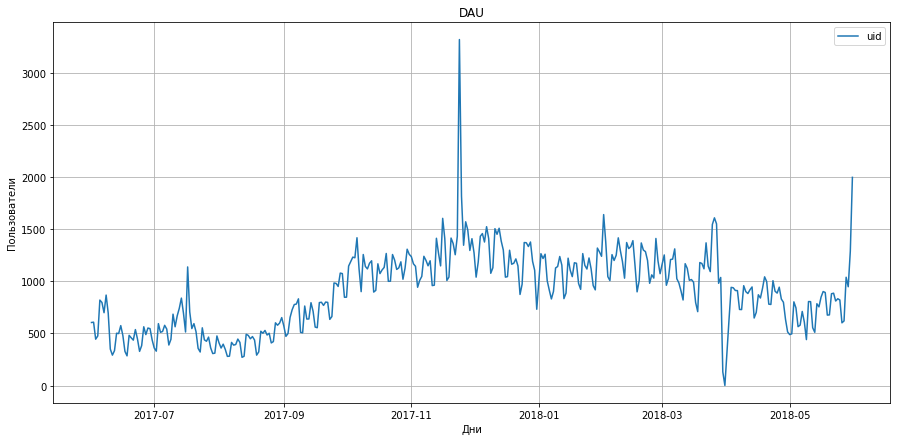

In [12]:
visits.groupby(['date']).agg({'uid': 'nunique'}).plot(figsize=(15,7), grid=True)
plt.title('DAU')
plt.ylabel('Пользователи')
plt.xlabel('Дни')
plt.show()

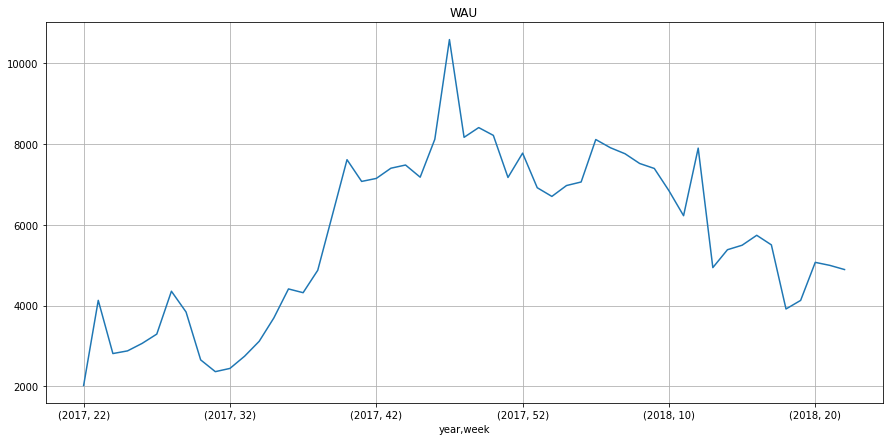

In [13]:
visits.groupby(['year', 'week']).agg({'uid': 'nunique'})['uid'].plot(figsize=(15,7), grid=True)
plt.title('WAU')
plt.show()

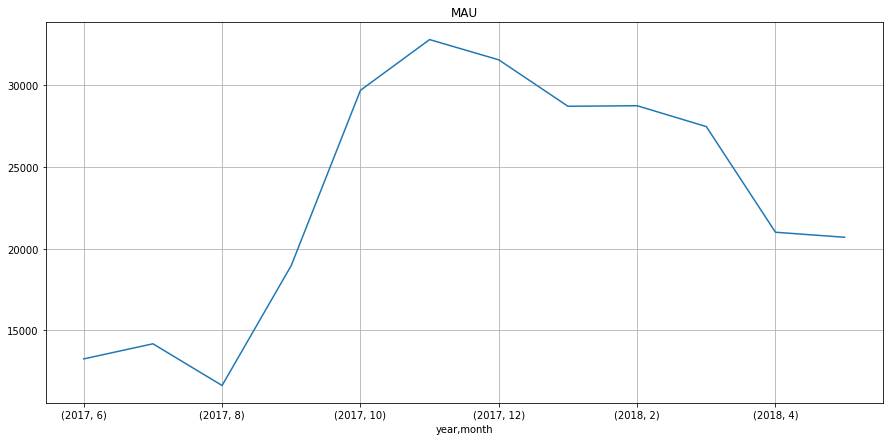

In [14]:
visits.groupby(['year', 'month']).agg({'uid': 'nunique'})['uid'].plot(figsize=(15,7), grid=True)
plt.title('MAU')
plt.show()

#### Определите, сколько раз за день пользователи в среднем заходят на сайт. Постройте график, отражающий изменения метрики во времени

Text(0.5, 0, 'Дни')

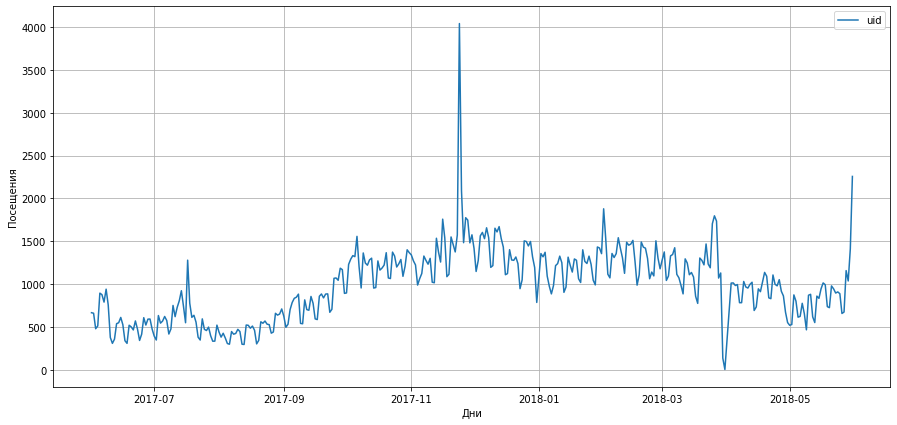

In [15]:
daily_sessions = visits.groupby('date').agg({'uid': 'count'})
daily_sessions.plot(figsize=(15, 7), grid=True)
plt.ylabel('Посещения')
plt.xlabel('Дни')

C 2017 по 2018 год кол-во посещений возросло с 500 до примерно 1500. 
Также Наблюдается резкий всплеск в районе ноября-декабря 2017 года, что вероятно связано с активным планированием свободного времени на новогодних выходных и праздниках.

In [16]:
daily_sessions.describe()

,uid
count,364.000000
mean,987.362637
std,418.994796
min,1.000000
25%,635.500000
50%,1003.000000
75%,1280.000000
max,4042.000000


Среднее и медианное значения количества посещений сайта разнятся незначительно. 
Возьмем среднее значение 987 посещений в день.

In [17]:
visits

,device,end_ts,source_id,start_ts,uid,date,week,month,year,day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,1
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,27
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017,29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018,3
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017,2


In [18]:
daily_sessions = visits.groupby(['uid', 'date']).agg({'start_ts': 'count'})
daily_sessions.describe()
# daily_sessions.plot(figsize=(15, 7), grid=True)
# plt.ylabel('Посещения')
# plt.xlabel('Дни')

,start_ts
count,330509.000000
mean,1.087414
std,0.371823
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,10.000000


#### Исследуйте, сколько времени пользователи проводят на сайте. Узнайте продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, постройте график распределения. Изменение продолжительности сессий во времени изучать необязательно

Иными словами нам нужно расчитать ASL. Для этого отнимем время начала сессии от времени конца сессии и извлечем секунды.

In [19]:
visits['s_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('Средняя продолжительность сессии:' , int(visits['s_duration'].mean()), 'сек.')

Средняя продолжительность сессии: 643 сек.


In [20]:
visits['s_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: s_duration, dtype: float64

Text(0.5, 0, 'Продолжительность сесии в секундах')

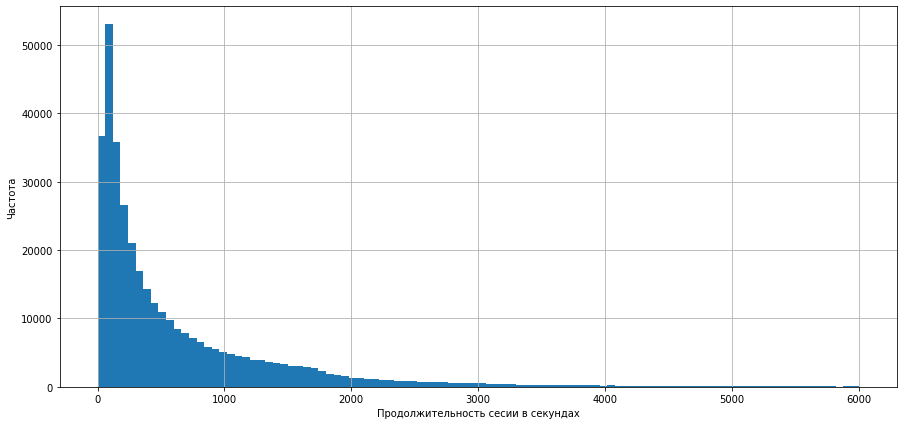

In [21]:
visits['s_duration'].plot(kind='hist', range=(0,6000), bins=100, figsize=(15,7), grid=True)
plt.ylabel('Частота')
plt.xlabel("Продолжительность сесии в секундах")

In [22]:
visits['s_duration'].mode()

0    60
dtype: int64

Учитывая среднее (643 сек), медиану (300 сек) и моду (60 сек) продолжительности сессии, можно сказать, что типичной является сессия длиной от 60 до 300 секунд.

#### Рассчитайте Retention Rate, применяя когортный анализ. Покажите изменения метрики во времени на графике. Найдите средний Retention Rate на второй месяц «жизни» когорт.

Retention Rate позволит увидеть как часто люди возвращаются к сайту, или другими словами как хорошо их удерживают.

In [23]:
#Сначала узнаем дату первого захода для каждого пользователя
first_visit = visits.groupby('uid')['date'].min()
first_visit.name = 'first_visit'

In [24]:
#Смержим таблицы визитов и даты первого входа
visits = visits.merge(first_visit, on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,day,s_duration,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,1,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,20,1440,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,9,1680,2018-03-09


In [25]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['date'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,date,week,month,year,day,s_duration,first_visit,first_visit_month,visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,20,1080,2017-12-20,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,19,1680,2018-02-19,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,1,0,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,20,1440,2018-03-09,2018-03-01,2018-05-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,9,1680,2018-03-09,2018-03-01,2018-03-01


Теперь в таблице есть столбцы с месяцем первого визита и с месяцем самого визита. 
Посмотрим для начала одну когорту. Для этого создадим сводную таблицу.

In [26]:
visits.pivot_table(index='first_visit_month', columns='visit_month', values='uid', aggfunc='nunique').fillna('')

visit_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_visit_month,,,,,,,,,,,,
2017-06-01,13259,1043,713,814,909,947,809,766,694,674,539,596.0
2017-07-01,,13140,737,674,738,765,633,596,601,510,376,361.0
2017-08-01,,,10181,783,640,639,510,448,370,402,284,265.0
2017-09-01,,,,16704,1428,1156,847,658,632,599,404,381.0
2017-10-01,,,,,25977,2042,1357,1012,890,837,555,529.0
2017-11-01,,,,,,27248,2133,1202,1054,919,638,594.0
2017-12-01,,,,,,,25268,1410,960,786,512,481.0
2018-01-01,,,,,,,,22624,1351,890,565,458.0
2018-02-01,,,,,,,,,22197,1267,565,446.0


По такой таблице можно оценить, что после первого месяца кол-во посещений сайта значительно падает. Только первые две когорты немного увеличивают посещения после первого месяца, остальные когорты стремительно снижаются.

Для дальнейшего анализа понадобится lifetime когорт. 

In [27]:
visits['cohort_lifetime'] = ((visits['visit_month'] - visits['first_visit_month'])\
                             / np.timedelta64(1,'M'))\
                                .round()\
                                .astype(int)
display(visits.head())

,device,end_ts,source_id,start_ts,uid,date,week,month,year,day,s_duration,first_visit,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,20,1080,2017-12-20,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,19,1680,2018-02-19,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,1,0,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,20,1440,2018-03-09,2018-03-01,2018-05-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,9,1680,2018-03-09,2018-03-01,2018-03-01,0


In [28]:
visits['first_visit_month'] = visits['first_visit_month'].dt.strftime('%Y-%m')

In [29]:
cohorts_visits = visits.pivot_table(index='first_visit_month', 
                                    columns='cohort_lifetime', 
                                    values='uid', 
                                    aggfunc='nunique')

In [30]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()
cohorts

,first_visit_month,cohort_lifetime,uid
0,2017-06,0,13259
1,2017-06,1,1043
2,2017-06,2,713
3,2017-06,3,814
4,2017-06,4,909
...,...,...,...
73,2018-03,1,861
74,2018-03,2,557
75,2018-04,0,15709
76,2018-04,1,760


In [31]:
#Найдем сколько изначально было визитов в когорте
initial_visit_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]
initial_visit_count = initial_visit_count.rename(columns={'uid': 'cohort_users'})
initial_visit_count

,first_visit_month,cohort_users
0,2017-06,13259
12,2017-07,13140
23,2017-08,10181
33,2017-09,16704
42,2017-10,25977
50,2017-11,27248
57,2017-12,25268
63,2018-01,22624
68,2018-02,22197
72,2018-03,20589


In [32]:
cohorts = cohorts.merge(initial_visit_count, on='first_visit_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']
cohorts

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03,1,861,20589,0.041818
74,2018-03,2,557,20589,0.027053
75,2018-04,0,15709,15709,1.000000
76,2018-04,1,760,15709,0.048380


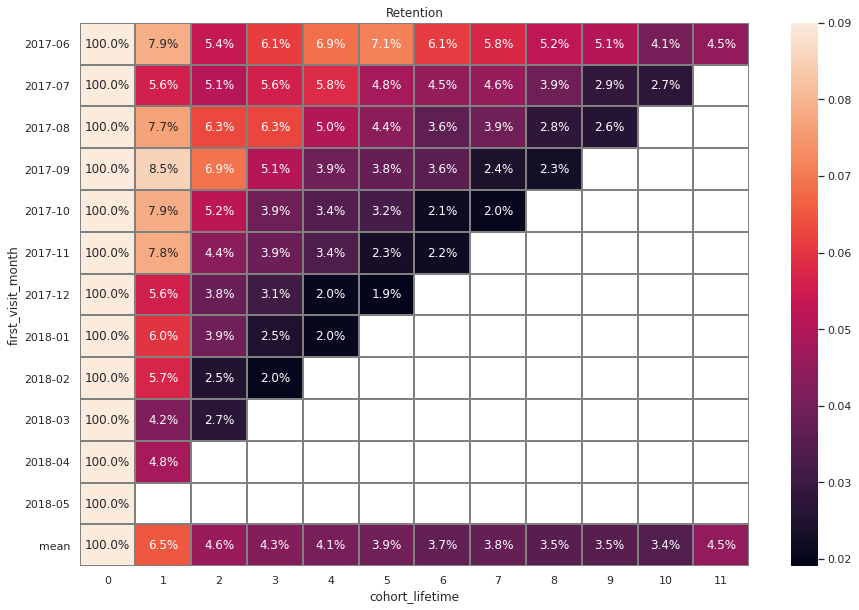

In [33]:
retention_pivot = cohorts.pivot_table(index='first_visit_month', 
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')
retention_pivot.loc['mean'] = retention_pivot.mean()


sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax=0.09, linewidths=1, linecolor='gray')

Retention rate снижается на первый же месяц. И далее редко увеличивается более чем на 1-2% относительно 5%.
90-95% отваливаются в первый месяц. 

#### Вывод

- Среднее кол-во уникальных пользователей в день около 908.
- Кол-во посещений сайта в среднем возросло с 500 до примерно 1500 за период с 2017 по 2018 год.
- Типичное время пребывания на сайте от 1 минуты до 5 минут.
- Retention Rate сильно падает с первого месяца входа на сайт.

Пользователи сервиса редко возвращаются к нему вновь, это повод задуматься маркетологам. Возможно в сервисе есть какие-то скрыты е проблемы. 

### Метрики электронной коммерции <a class="anchor" id="step2.2"></a>

#### Исследуйте, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучать изменение этой метрики во времени необязательно;

In [34]:
first_order_date = orders.groupby(['uid'])['buy_ts'].min()
first_order_date.name = 'first_order_datetime'
orders = orders.merge(first_order_date, on='uid')

orders = orders.merge(visits.query('uid in @orders.uid').groupby('uid')['start_ts'].min(), on='uid')
orders

,buy_ts,revenue,uid,first_order_datetime,start_ts
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00


In [35]:
orders['time_to_order'] = (orders['first_order_datetime'] - orders['start_ts'])
orders['time_to_order'].describe()

count                         50415
mean     17 days 14:48:59.437072352
std      46 days 11:10:48.112360224
min                 0 days 00:00:00
25%                 0 days 00:04:00
50%                 0 days 00:22:00
75%                 4 days 07:51:00
max               363 days 07:04:00
Name: time_to_order, dtype: object

In [36]:
orders

,buy_ts,revenue,uid,first_order_datetime,start_ts,time_to_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00


В среднем уходит 17 дней. Но этот показатель необьективен, потому что складывается из-за выбросов. Более адекватным показателем считаю медиану - 0 дней. Для бизнеса важно, чтобы большинство покупала в первый же (нулевой) день. Здесь как раз это мы и видим - большая часть пользователей заказывает в первый день.

#### Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

Применим когортный анализ.
Для начала выделим только месяц из даты первого заказа и дат последующих заказов и запишем их в отдельные столбцы.

In [37]:
orders['first_order_month'] = orders['first_order_datetime'].astype('datetime64[M]')
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
display(orders.head())

,buy_ts,revenue,uid,first_order_datetime,start_ts,time_to_order,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,2017-06-01,2017-06-01


In [38]:
#Выделим lifetime когорт в отдельнуый столбец
orders['cohort_lifetime'] = ((orders['order_month'] - orders['first_order_month']) / np.timedelta64(1, 'M'))\
                                .round()\
                                .astype('int')
orders

,buy_ts,revenue,uid,first_order_datetime,start_ts,time_to_order,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,2017-06-01,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,2017-06-01,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2017-06-01,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,2017-06-01,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,2018-05-01,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,2018-05-01,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,2018-05-01,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,2018-05-01,2018-05-01,0


In [39]:
#Укоротим дату для красоты отображения на графике
orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')

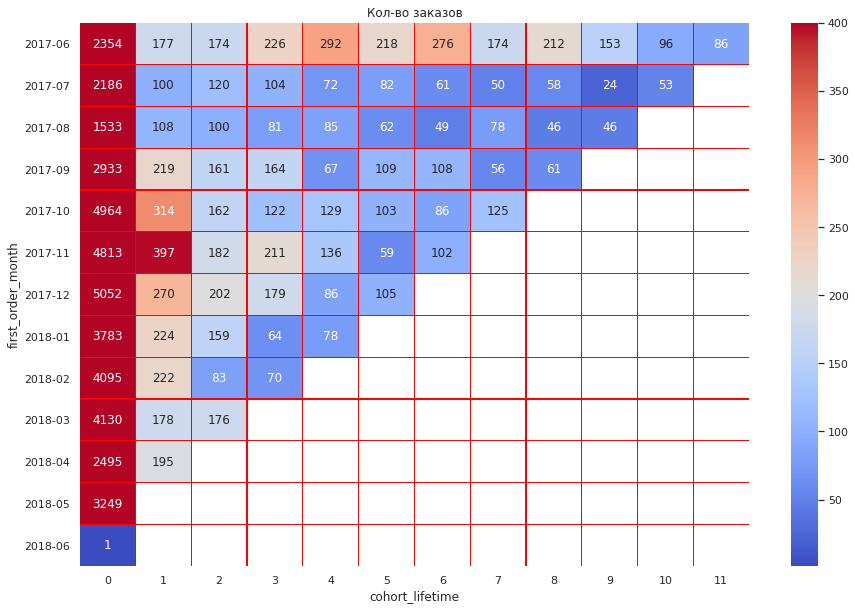

In [40]:

#Сделаем сводную таблицу отображающую кол-во заказов покогортно
orders_pivot = orders.pivot_table(index='first_order_month', 
                                  columns='cohort_lifetime', 
                                  values='uid', 
                                  aggfunc='count')
                                  

sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Кол-во заказов')
sns.heatmap(orders_pivot, annot=True, fmt='.0f', vmax=400, linewidths=0.1, linecolor='red', cmap='coolwarm')

На тепловой карте мы можем увидеть, что максимальное кол-во заказов происходит в первый (нулевой) месяц. 
Пик заказов пришелся на осень 2017, что вероятно связано с подготовкой к новому году, к длительным выходным.
В некоторых когортах иногда кол-во заказов неначительно возрастает.

Посчитаем среднее кол-во заказов по периодам.

In [41]:
orders

,buy_ts,revenue,uid,first_order_datetime,start_ts,time_to_order,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,2017-06,2017-06-01,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,2018-05,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,2018-05,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,2018-05,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,2018-05,2018-05-01,0


In [42]:
orders.query('"2017-01" <= order_month < "2017-07"').groupby('uid')['buy_ts'].count().describe()

count    2023.000000
mean        1.163618
std         0.600380
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        13.000000
Name: buy_ts, dtype: float64

#### Рассчитайте средний чек, применяя группировку по времени совершения покупки. Когортный анализ не подходит — он может исказить расчёты. Постройте график, отражающий изменения метрики во времени

In [43]:
orders['revenue'].describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

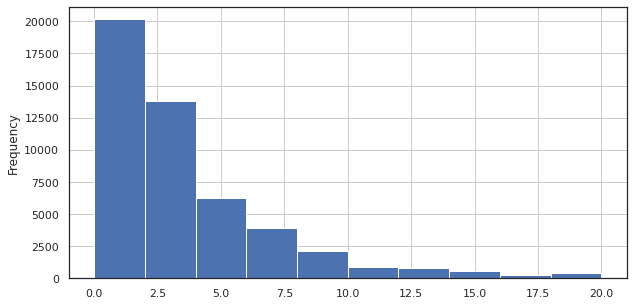

In [44]:
orders['revenue'].plot(kind='hist', figsize=(10,5), grid=True, range=(0,20))

Средний чек с клиента порядка 5 у.е.

In [45]:
revenue_monthly = orders.groupby('order_month')['revenue'].mean()
revenue_monthly

order_month
2017-06-01    4.060106
2017-07-01    5.306589
2017-08-01    4.847139
2017-09-01    5.416448
2017-10-01    4.928280
2017-11-01    4.783518
2017-12-01    5.852139
2018-01-01    4.112927
2018-02-01    4.840095
2018-03-01    5.413930
2018-04-01    5.150645
2018-05-01    4.771279
2018-06-01    3.420000
Name: revenue, dtype: float64

Text(0.5, 1.0, '')

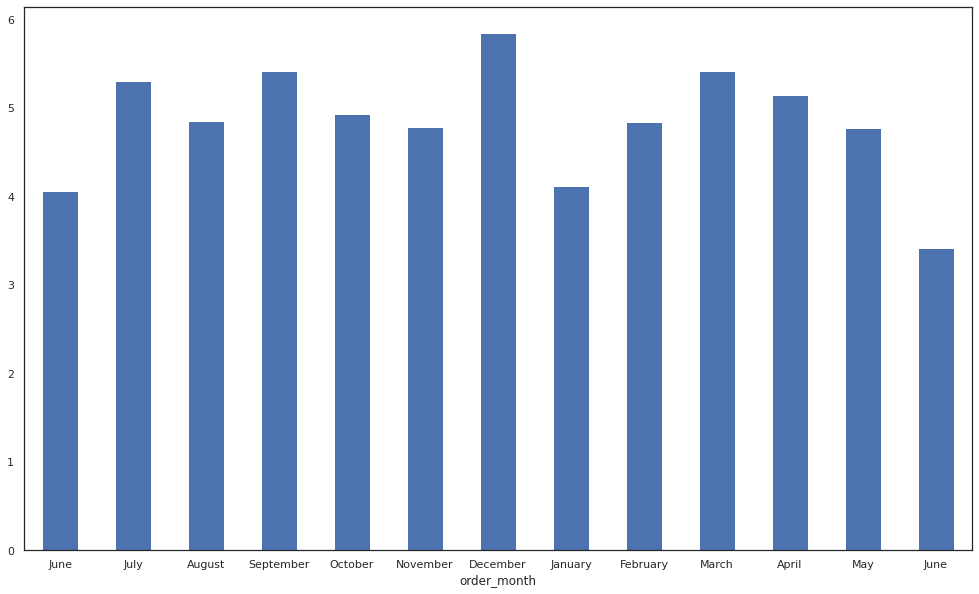

In [46]:
monthes = ['June', 'July', 'August', 'September', 'October', \
           'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June']
ax = revenue_monthly.plot(kind='bar', figsize=(17,10))
ax.set_xticklabels(monthes, rotation=0)
plt.title('')

#### Выясните, как меняется LTV на покупателя по когортам. Помните, что LTV — накопительная метрика. Рассчитайте средний LTV по когортам за 6 месяцев; в расчёт включайте когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Отразите изменения метрики во времени на графике;

In [47]:
display(orders)

,buy_ts,revenue,uid,first_order_datetime,start_ts,time_to_order,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,2017-06,2017-06-01,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,2018-05,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,2018-05,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,2018-05,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,2018-05,2018-05-01,0


LTV считается по когортам.

Найдем месяц первой покупки каждого покупателя.

In [48]:
user_first_order = orders.groupby('uid')['first_order_month'].min().reset_index()
user_first_order

,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11
...,...,...
36518,18445147675727495770,2017-11
36519,18445407535914413204,2017-09
36520,18445601152732270159,2018-03
36521,18446156210226471712,2018-02


Посчитаем кол-во новых покупателей (n_buyers) за каждый месяц.

In [49]:
cohort_sizes = user_first_order.groupby('first_order_month')\
                                        .agg({'uid': 'nunique'})\
                                        .reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340
5,2017-11,4081
6,2017-12,4383
7,2018-01,3373
8,2018-02,3651
9,2018-03,3533


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. 


In [50]:
cohorts = orders.groupby(['first_order_month', 'order_month'])\
                            .agg({'revenue': 'sum'})\
                            .reset_index()
cohorts

,first_order_month,order_month,revenue
0,2017-06,2017-06-01,9557.49
1,2017-06,2017-07-01,981.82
2,2017-06,2017-08-01,885.34
3,2017-06,2017-09-01,1931.30
4,2017-06,2017-10-01,2068.58
...,...,...,...
74,2018-03,2018-05-01,1114.87
75,2018-04,2018-04-01,10600.69
76,2018-04,2018-05-01,1209.92
77,2018-05,2018-05-01,13925.76


Таблица показывает что первая когорта принесла в первом месяце 9557, а во втором месяце уже 981 и тд.

Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц

In [51]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report['first_order_month'] = report['first_order_month'].astype('datetime64[M]')
report['order_month'] = report['order_month'].astype('datetime64[M]')
report.dtypes

first_order_month    datetime64[ns]
n_buyers                      int64
order_month          datetime64[ns]
revenue                     float64
dtype: object

Добавим возраст когорт (age) в таблицу report.

In [52]:
report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype(int)
                                
report

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4
...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2
75,2018-04-01,2276,2018-04-01,10600.69,0
76,2018-04-01,2276,2018-05-01,1209.92,1
77,2018-05-01,2988,2018-05-01,13925.76,0


In [53]:
#Добавим столбец с LTV разделив валовую прибыль когорт на кол-во пользователей в когорте
report['ltv'] = report['revenue'] / report['n_buyers']

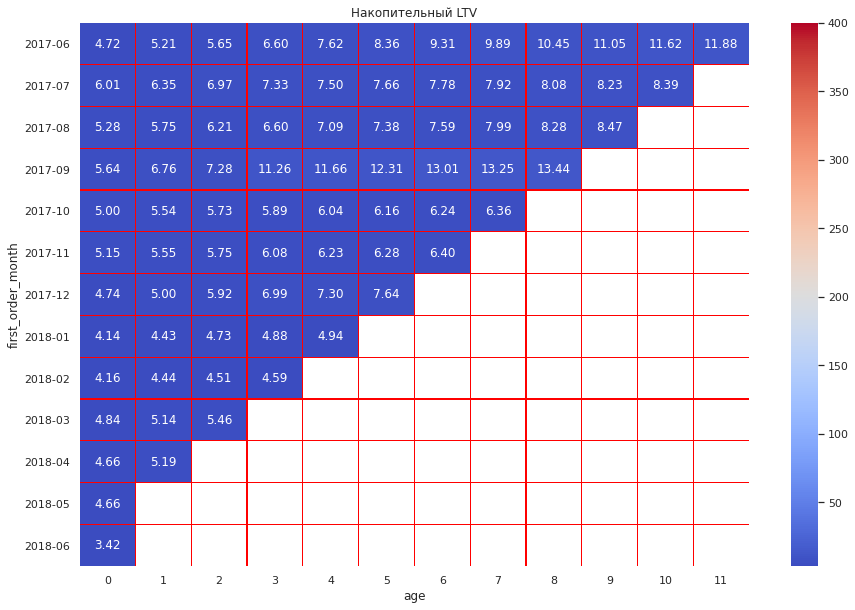

In [54]:
report_ltv = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
report_ltv.index = pd.DatetimeIndex(report_ltv.index).to_period('M')

sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Накопительный LTV')
# plt.ylabel('Когорта')
# plt.xlabel('Возраст когорты')
sns.heatmap(report_ltv.cumsum(axis=1), annot=True, fmt='.2f', vmax=400, linewidths=0.1, linecolor='red', cmap='coolwarm')

In [55]:
old_cohorts = report.query('age >=5')['first_order_month'].unique()
six_month_cohorts = report.query('age <= 5 and first_order_month in @old_cohorts')
six_month_cohorts

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
5,2017-06-01,2023,2017-11-01,1487.92,5,0.735502
12,2017-07-01,1923,2017-07-01,11557.65,0,6.010218
13,2017-07-01,1923,2017-08-01,644.61,1,0.335211
14,2017-07-01,1923,2017-09-01,1199.05,2,0.623531
15,2017-07-01,1923,2017-10-01,690.31,3,0.358976


In [56]:
old_ltv = six_month_cohorts.pivot_table(index='first_order_month', columns='age', values='ltv')
old_ltv

age,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047


In [58]:
six_month_cohorts_mean = six_month_cohorts.groupby('first_order_month')['ltv'].sum().mean()
six_month_cohorts_mean

7.969052630207336

Для когорт возрастом от 6 месяцев средний LTV составляет 8 у.е. Иными словами не стоит тратить более 8 у.е. на привлечение, иначе бизнес будет убыточным.

#### Вывод

- Преобладающее большинство пользователей совершает покупку в первый день пользования сервисом, хороший показатель для любого бизнеса.
- В среднем на одного пользователя приходится одна покупка
- Средний чек с клиента порядка 5 у.е. И он немного проседает в июне и январе.
- Для когорт возрастом от 6 месяцев средний LTV составляет 8 у.е. Иными словами не стоит тратить более 8 у.е. на привлечение, иначе бизнес будет убыточным.

### Маркетинговые метрики <a class="anchor" id="step2.3"></a>

#### Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам. Визуализируйте изменения метрик во времени

In [59]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [60]:
costs['costs'].sum()

329131.62

Всего на маркетинг потрачено около 330000 у.е.

In [61]:
#выделим месяц трат в отдельный столбец
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [63]:
#
# def get_month_name(row):
#     row = row['costs_month']
#     month = row.strftime('%m-%B')
#     return month
# costs['name_costs_month'] = costs.apply(get_month_name, axis=1)
costs

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [64]:
costs_per_month = costs.groupby(['costs_month']).agg({'costs': 'sum'})
costs_per_month

,costs
costs_month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


Text(0, 0.5, 'Расходы на маркетинг')

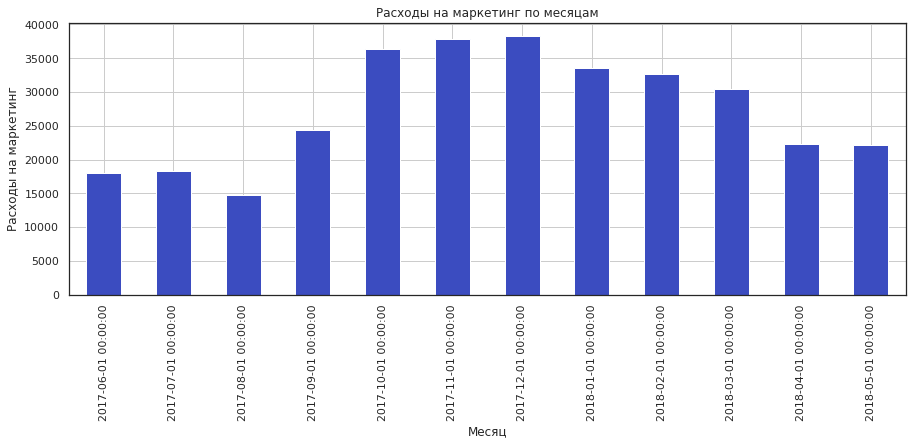

In [66]:
costs_per_month.plot(kind='bar', grid=True, colormap='coolwarm', figsize=(15,5), legend='')
plt.title('Расходы на маркетинг по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы на маркетинг')

Text(0.5, 0, 'Сумма расходов, у.е.')

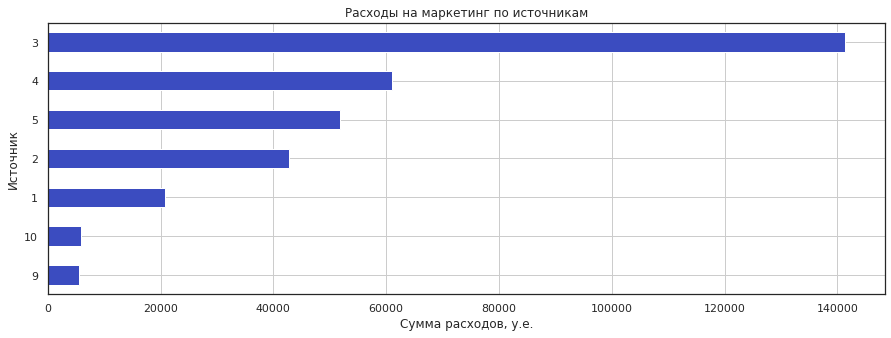

In [67]:
costs_per_source = costs.groupby('source_id').agg({'costs': 'sum'})
costs_per_source.sort_values(by=['costs'])\
                            .plot(kind='barh', grid=True, colormap='coolwarm', figsize=(15,5), legend='')
plt.title('Расходы на маркетинг по источникам')
plt.ylabel('Источник')
plt.xlabel('Сумма расходов, у.е.')

Text(0.5, 0, 'Месяц')

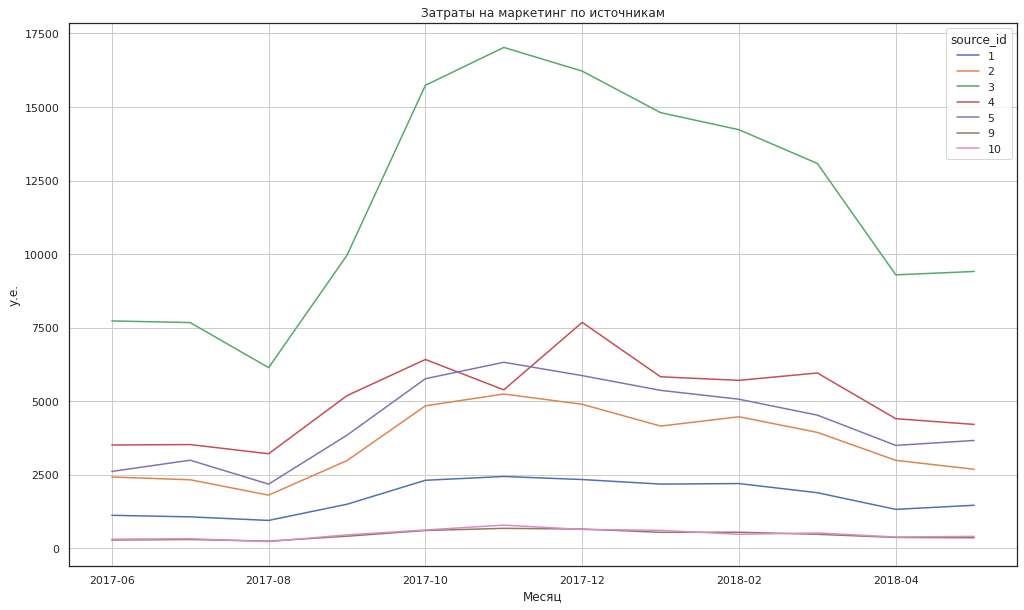

In [68]:
costs_per_date = costs.groupby(['costs_month', 'source_id']).agg({'costs': 'sum'}).reset_index()
costs_per_date['costs_month'] = costs_per_date['costs_month'].dt.strftime('%Y-%m')
costs_per_date.pivot_table(index='costs_month', columns='source_id', values='costs').plot(figsize=(17,10), grid=True)
plt.title('Затраты на маркетинг по источникам')
plt.ylabel('у.е.')
plt.xlabel('Месяц')

- Всего на маркетинг потратили порядка 330000 у.е.
- Больше всего потратили на маркетинг осенью/зимой в ноябре и декабре затраты самые большие больше 35000. К слову сказать именно в этот период мы видели наибольшее кол-во входов и заказов.
- Самый затратный источник №3, затем 4 и 5. На источник №3 потрачено более 140000.

#### Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика. Отразите изменения метрик на графиках

In [69]:
orders

,buy_ts,revenue,uid,first_order_datetime,start_ts,time_to_order,first_order_month,order_month,cohort_lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,2017-06,2017-06-01,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,2017-06,2017-06-01,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2017-06,2017-06-01,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,2017-06,2017-06-01,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,2017-06,2017-06-01,0
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-31 09:11:00,0 days 14:39:00,2018-05,2018-05-01,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-31 23:05:00,0 days 00:45:00,2018-05,2018-05-01,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-31 23:52:00,0 days 00:02:00,2018-05,2018-05-01,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2017-10-23 12:32:00,220 days 11:24:00,2018-05,2018-05-01,0


In [70]:
report

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [71]:
report_new = pd.merge(report, costs_per_month, left_on='first_order_month', right_on='costs_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']
report_new

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs,cac,romi
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00,8.905091,0.530530
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00,8.905091,0.054500
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00,8.905091,0.049145
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00,8.905091,0.107205
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00,8.905091,0.114825
...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.300892,30415.27,8.608907,0.034951
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30415.27,8.608907,0.036655
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22289.38,9.793225,0.475594
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22289.38,9.793225,0.054282


In [72]:
report_new['cac'].mean()

9.319905176921111

In [73]:
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


Прискорбно видеть, что пока только две когорты окупаемы (в июне и в сентябре). Близка к окупаемости июльская когорта и декабрьская.

Далее нужно сколько было привлечено покупателей из разных источников по месяцам.

In [74]:
first_visit_order = visits\
                             .query('uid in @orders.uid')\
                             .groupby('uid').agg({'start_ts':'first', 'source_id':'first'})\
                             .reset_index()
first_visit_order['month'] = first_visit_order['start_ts'].astype('datetime64[M]')
first_visit_source_m = first_visit_order.groupby(['source_id', 'month'])['uid'].count().reset_index()
first_visit_source_m.columns = ['source_id', 'costs_month', 'n_buyers']
display(first_visit_source_m)

,source_id,costs_month,n_buyers
0,1,2017-06-01,195
1,1,2017-07-01,191
2,1,2017-08-01,130
3,1,2017-09-01,253
4,1,2017-10-01,397
...,...,...,...
80,10,2018-01-01,106
81,10,2018-02-01,125
82,10,2018-03-01,164
83,10,2018-04-01,116


In [75]:
#Объеденим затраты по месяцам с полученной таблицей
monthly_costs = costs.groupby(['source_id','costs_month']).agg({'costs':'sum'}).reset_index()
costs_per_user = pd.merge(first_visit_source_m, monthly_costs, on=['source_id','costs_month'])

costs_per_user

,source_id,costs_month,n_buyers,costs
0,1,2017-06-01,195,1125.61
1,1,2017-07-01,191,1072.88
2,1,2017-08-01,130,951.81
3,1,2017-09-01,253,1502.01
4,1,2017-10-01,397,2315.75
...,...,...,...,...
79,10,2018-01-01,106,614.35
80,10,2018-02-01,125,480.88
81,10,2018-03-01,164,526.41
82,10,2018-04-01,116,388.25


In [76]:
costs_per_user['cac'] = costs_per_user['costs'] / costs_per_user['n_buyers']
costs_per_user

,source_id,costs_month,n_buyers,costs,cac
0,1,2017-06-01,195,1125.61,5.772359
1,1,2017-07-01,191,1072.88,5.617173
2,1,2017-08-01,130,951.81,7.321615
3,1,2017-09-01,253,1502.01,5.936798
4,1,2017-10-01,397,2315.75,5.833123
...,...,...,...,...,...
79,10,2018-01-01,106,614.35,5.795755
80,10,2018-02-01,125,480.88,3.847040
81,10,2018-03-01,164,526.41,3.209817
82,10,2018-04-01,116,388.25,3.346983


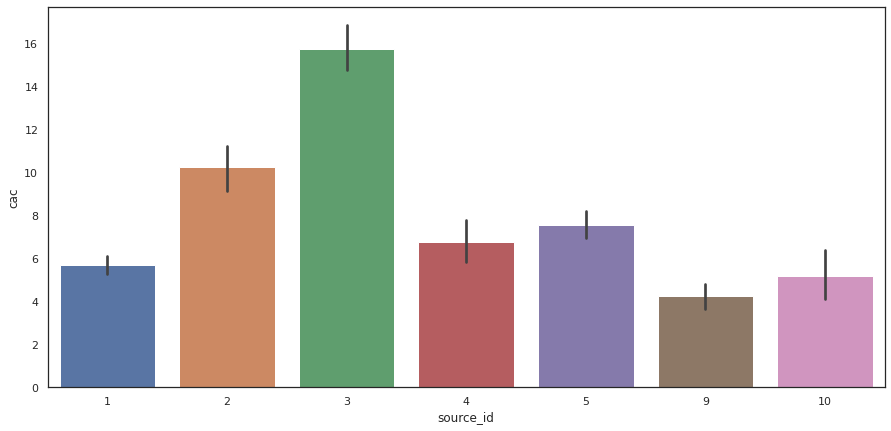

In [77]:
plt.figure(figsize=(15,7))
ax = sns.barplot(data=costs_per_user, x='source_id', y='cac')

Получается, что дороже всего обходятся клиенты из 2 источника и стоят почти 16 у.е, далее 3 источник со стоимостью привлечения около 10 у.е., потом остальные.

In [78]:
costs_per_source = costs.groupby('source_id')['costs'].sum()
costs_per_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

In [79]:
visits_by_source = visits.query('start_ts == first_visit')
visits_by_source

,device,end_ts,source_id,start_ts,uid,date,week,month,year,day,s_duration,first_visit,first_visit_month,visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,20,1080,2017-12-20,2017-12,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,19,1680,2018-02-19,2018-02,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,1,0,2017-07-01,2017-07,2017-07-01,0
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,9,1680,2018-03-09,2018-03,2018-03-01,0
5,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,27,0,2017-12-27,2017-12,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,17,4,2018,23,480,2018-04-23,2018-04,2018-04-01,0
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,45,11,2017,8,0,2017-11-08,2017-11,2017-11-01,0
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,31,7,2017,31,1080,2017-07-31,2017-07,2017-07-01,0
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,12,3,2018,20,840,2018-03-20,2018-03,2018-03-01,0


In [80]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,49135.61
1,2,71226.19
2,3,58056.13
3,4,60759.98
4,5,64625.13
5,7,1.22
6,9,6048.58
7,10,5494.15


In [81]:
roi = revenue_by_source.join(costs_per_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

In [82]:
roi.sort_values('roi', ascending = False)

,revenue,costs,roi
source_id,,,
1,49135.61,20833.27,1.358516
2,71226.19,42806.04,0.663929
5,64625.13,51757.10,0.248623
9,6048.58,5517.49,0.096256
4,60759.98,61073.60,-0.005135
10,5494.15,5822.49,-0.056392
3,58056.13,141321.63,-0.589191
7,1.22,NaN,NaN


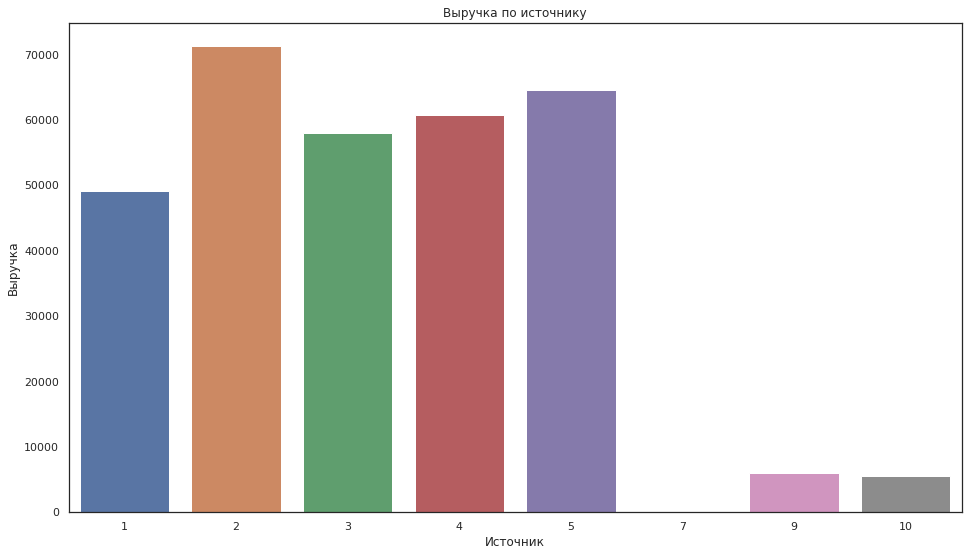

In [83]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", data=roi.reset_index())
plt.title('Выручка по источнику')
ax.set_xlabel('Источник')
ax.set_ylabel('Выручка')
plt.show()


Самый выгодный источник - №1. Его ROI самый высокий.
Однако по объему выручки лидирует источник №2, но его ROI вдвое ниже чем у первого источника.

#### Рассчитайте ROMI по когортам в разрезе источников. Сравните окупаемость за одинаковые периоды жизни когорт. Обратите внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV. Постройте графики, отражающие изменения метрик во времени.

Рассчитаем ROMI поделив LTV на CAC.

In [84]:
costs

,source_id,dt,costs,costs_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [85]:
monthly_costs = costs.groupby('costs_month').agg({'costs': 'sum'})

In [86]:
report

,first_order_month,n_buyers,order_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [87]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='costs_month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new

,first_order_month,n_buyers,order_month,revenue,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,18015.00,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,18015.00,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,18015.00,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,18015.00,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,18015.00,8.905091
...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.300892,30415.27,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,30415.27,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,22289.38,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,22289.38,9.793225


In [88]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


Первая июньская когорта окупается на 7й месяц (romi 1.05), сентябрьская когорта на 4й месяц (romi 1.19). Остальные когорты не окупились (близки июльская и декабрьская когорты).

In [89]:
output.cumsum(axis=1).mean(axis=0)

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем когорты окупаются к 9 месяцу. И это довольно таки долго - повод задуматься насчет расходов на маркетинг и маркетинговой стратегии впринципе. 

## Шаг 3. Сформулируйте выводы и рекомендации <a class="anchor" id="step3"></a>

In [90]:
report_new['ltv'].sum() - report_new['cac'].sum()

-639.5510839299665

Получается, что мы тратим на привлечение больше, чем получаем валовой прибыли с клиента. 

Маркетологам стоит ориентироваться на источники №1 и №2. Их ROI наиболее высокие и выручка от клиентов из этих источников высокая. А вот источник №3, несмотря на свою дороговизну, совсем невыгодный - его ROI отрицательный.

В ходе исследования мы могли оценить:
- DAU 908
- В среднем к продукту обращаются 1000 раз за день.
- Типичной сессией является от 1 минуты до 5 минут.
- Первую покупку пользователи совершают в первый (нулевой) день обращения.
- Удержание клиентов плохое, также как и кол-во заказов в разрезе времени - их становится все меньше с каждым днем.
- Средний LTV когорт (с lifetime более 6 месяцев) около 8 у.е.
- Средний чек 5 у.е.

Окупаемыми оказались только две когорты из всех. В среднем когорты становятся окупаемыми на 9 месяц.

Пользователь в большинстве своем не задерживаются в сервисе. Retention Rate очень низкий и это может говорить как о проблемах технических (неудобный интерфейс, проблемы в работе), так и о том, что возможно сервис неинтересен (плохой контент к примеру). Стоит подумать над тем как улучшить сервис - улучшить интерфейс, предложить клиентам акции, подумать над отзывами и тд.

Однозначно стоит построить воронку продаж, выявить на каком этапе есть проблемы.

В отношении источников клиентов необходимо пересмотреть вложения в источник №3, он самый затратный но самый малоэффективный.